In [2]:
# Importing libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as pl
import seaborn as sns
from sklearn import tree

In [5]:
## Reading .csv files
df = pd.read_csv("data/corrected.csv",sep=',',header=None)

## Defining columns
col_names = pd.read_csv("data/column_names.csv",sep=',',header=None)[0].values
df.columns = col_names

## Identifying columns as categorical or not
categorical_columns = ["protocol_type","service","flag","land","logged_in","root_shell","su_attempted",
                       "is_host_login","is_guest_login","label"]
df_categorical = df[categorical_columns]
df_non_categorical = df.drop(categorical_columns, axis=1)

IOError: File data/column_names.csv does not exist

In [1]:
## A glance at the non categorical data
df_non_categorical.describe()

NameError: name 'df_non_categorical' is not defined

## Análise de variáveis discretas


### Relação entre Ataques e Serviços de Rede

Vamos começar analisando a relação entre o serviço de rede utilizado pelo destino dos pacotes e os ataques identificados. Para tal, vamos plotar um gráfico de barras que mostra o percentual de participação de cada serviço de rece em cada ataque.

De modo a facilitar a visualização, vamos considerar apenas variáveis que representem ao menos 1% do percentual total de ataques ou tipos de serviço de rede.



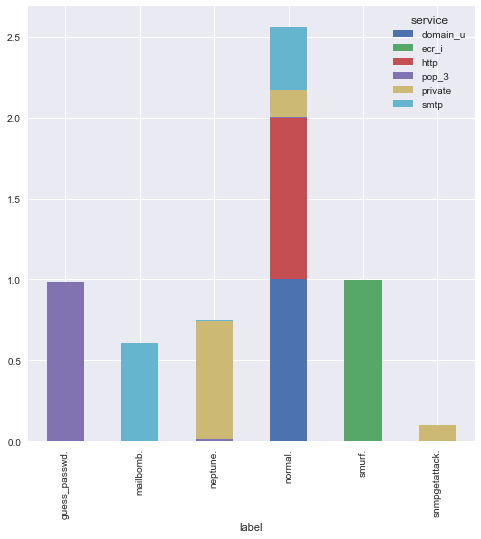

In [84]:
## Create a subset of main dataset (f_data) that contains only services and labels that represents at
## least 1% of the total cases

f_services = pd.crosstab(index=df["service"],columns="count")
f_services = f_services/len(df)
f_services = f_services[f_services["count"] > 0.01]

f_attacks = pd.crosstab(index=df["label"],columns="count")
f_attacks = f_attacks/len(df)
f_attacks = f_attacks[f_attacks["count"] > 0.01]

f_data = df[df['service'].isin(list(f_services.index))]
f_data = f_data[f_data['label'].isin(list(f_attacks.index))]


attack_data = pd.crosstab(index = f_data["label"], columns=f_data["service"])
frequency_table_attack = (attack_data/attack_data.sum())

frequency_table_attack.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True);

### Relação entre Ataques e Tipos de Protocolo

Utilizando a mesma abordagem anterior, iremos avalair o percentual de participcação de cada protocolo de rede em cada tipo de ataque.

O objetivo desse análise é visualziar se existe alguma característica que foge do conhecido pela literatura.

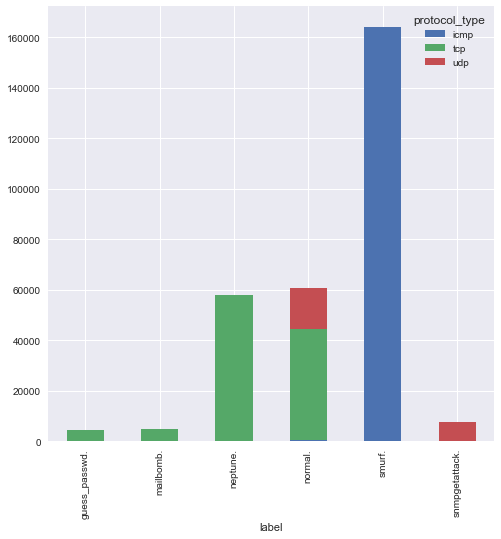

In [86]:
## Create a subset of main dataset (f_data) that contains only protocols and labels that represents at
## least 1% of the total cases

f_protocol = pd.crosstab(index=df["protocol_type"],columns="count")
f_protocol = f_protocol/len(df)
f_protocol = f_protocol[f_protocol["count"] > 0.01]

f_data = df[df['protocol_type'].isin(list(f_protocol.index))]
f_data = f_data[f_data['label'].isin(list(f_attacks.index))]

## Create a Two-Way Table

relationship_protocoal_attack = pd.crosstab(index=f_data["label"], 
                          columns=f_data["protocol_type"])
## Plot the Two-Way Table
relationship_protocoal_attack.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True);

### Participação percentual de cada tipo de protocolo de rede

O gráfico abaixo visa dar uma visão geral da participação de cada tipo de protocolo na rede na qual os dados foram coletados.

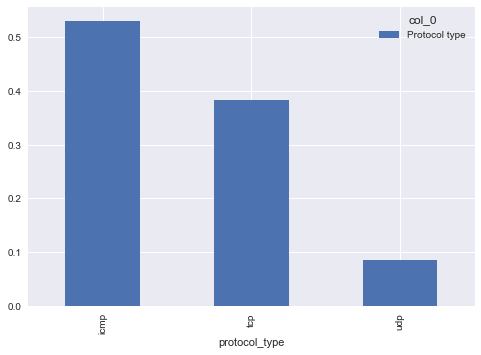

In [7]:
## Create a cross tab dataframe
protocol_data = pd.crosstab(index = df["protocol_type"],columns="Protocol type")
frequency_table_protocol = (protocol_data/protocol_data.sum())

## Plot the dataframe
frequency_table_protocol.plot.bar();

## Análise de variáveis contínuas

### Histogramas

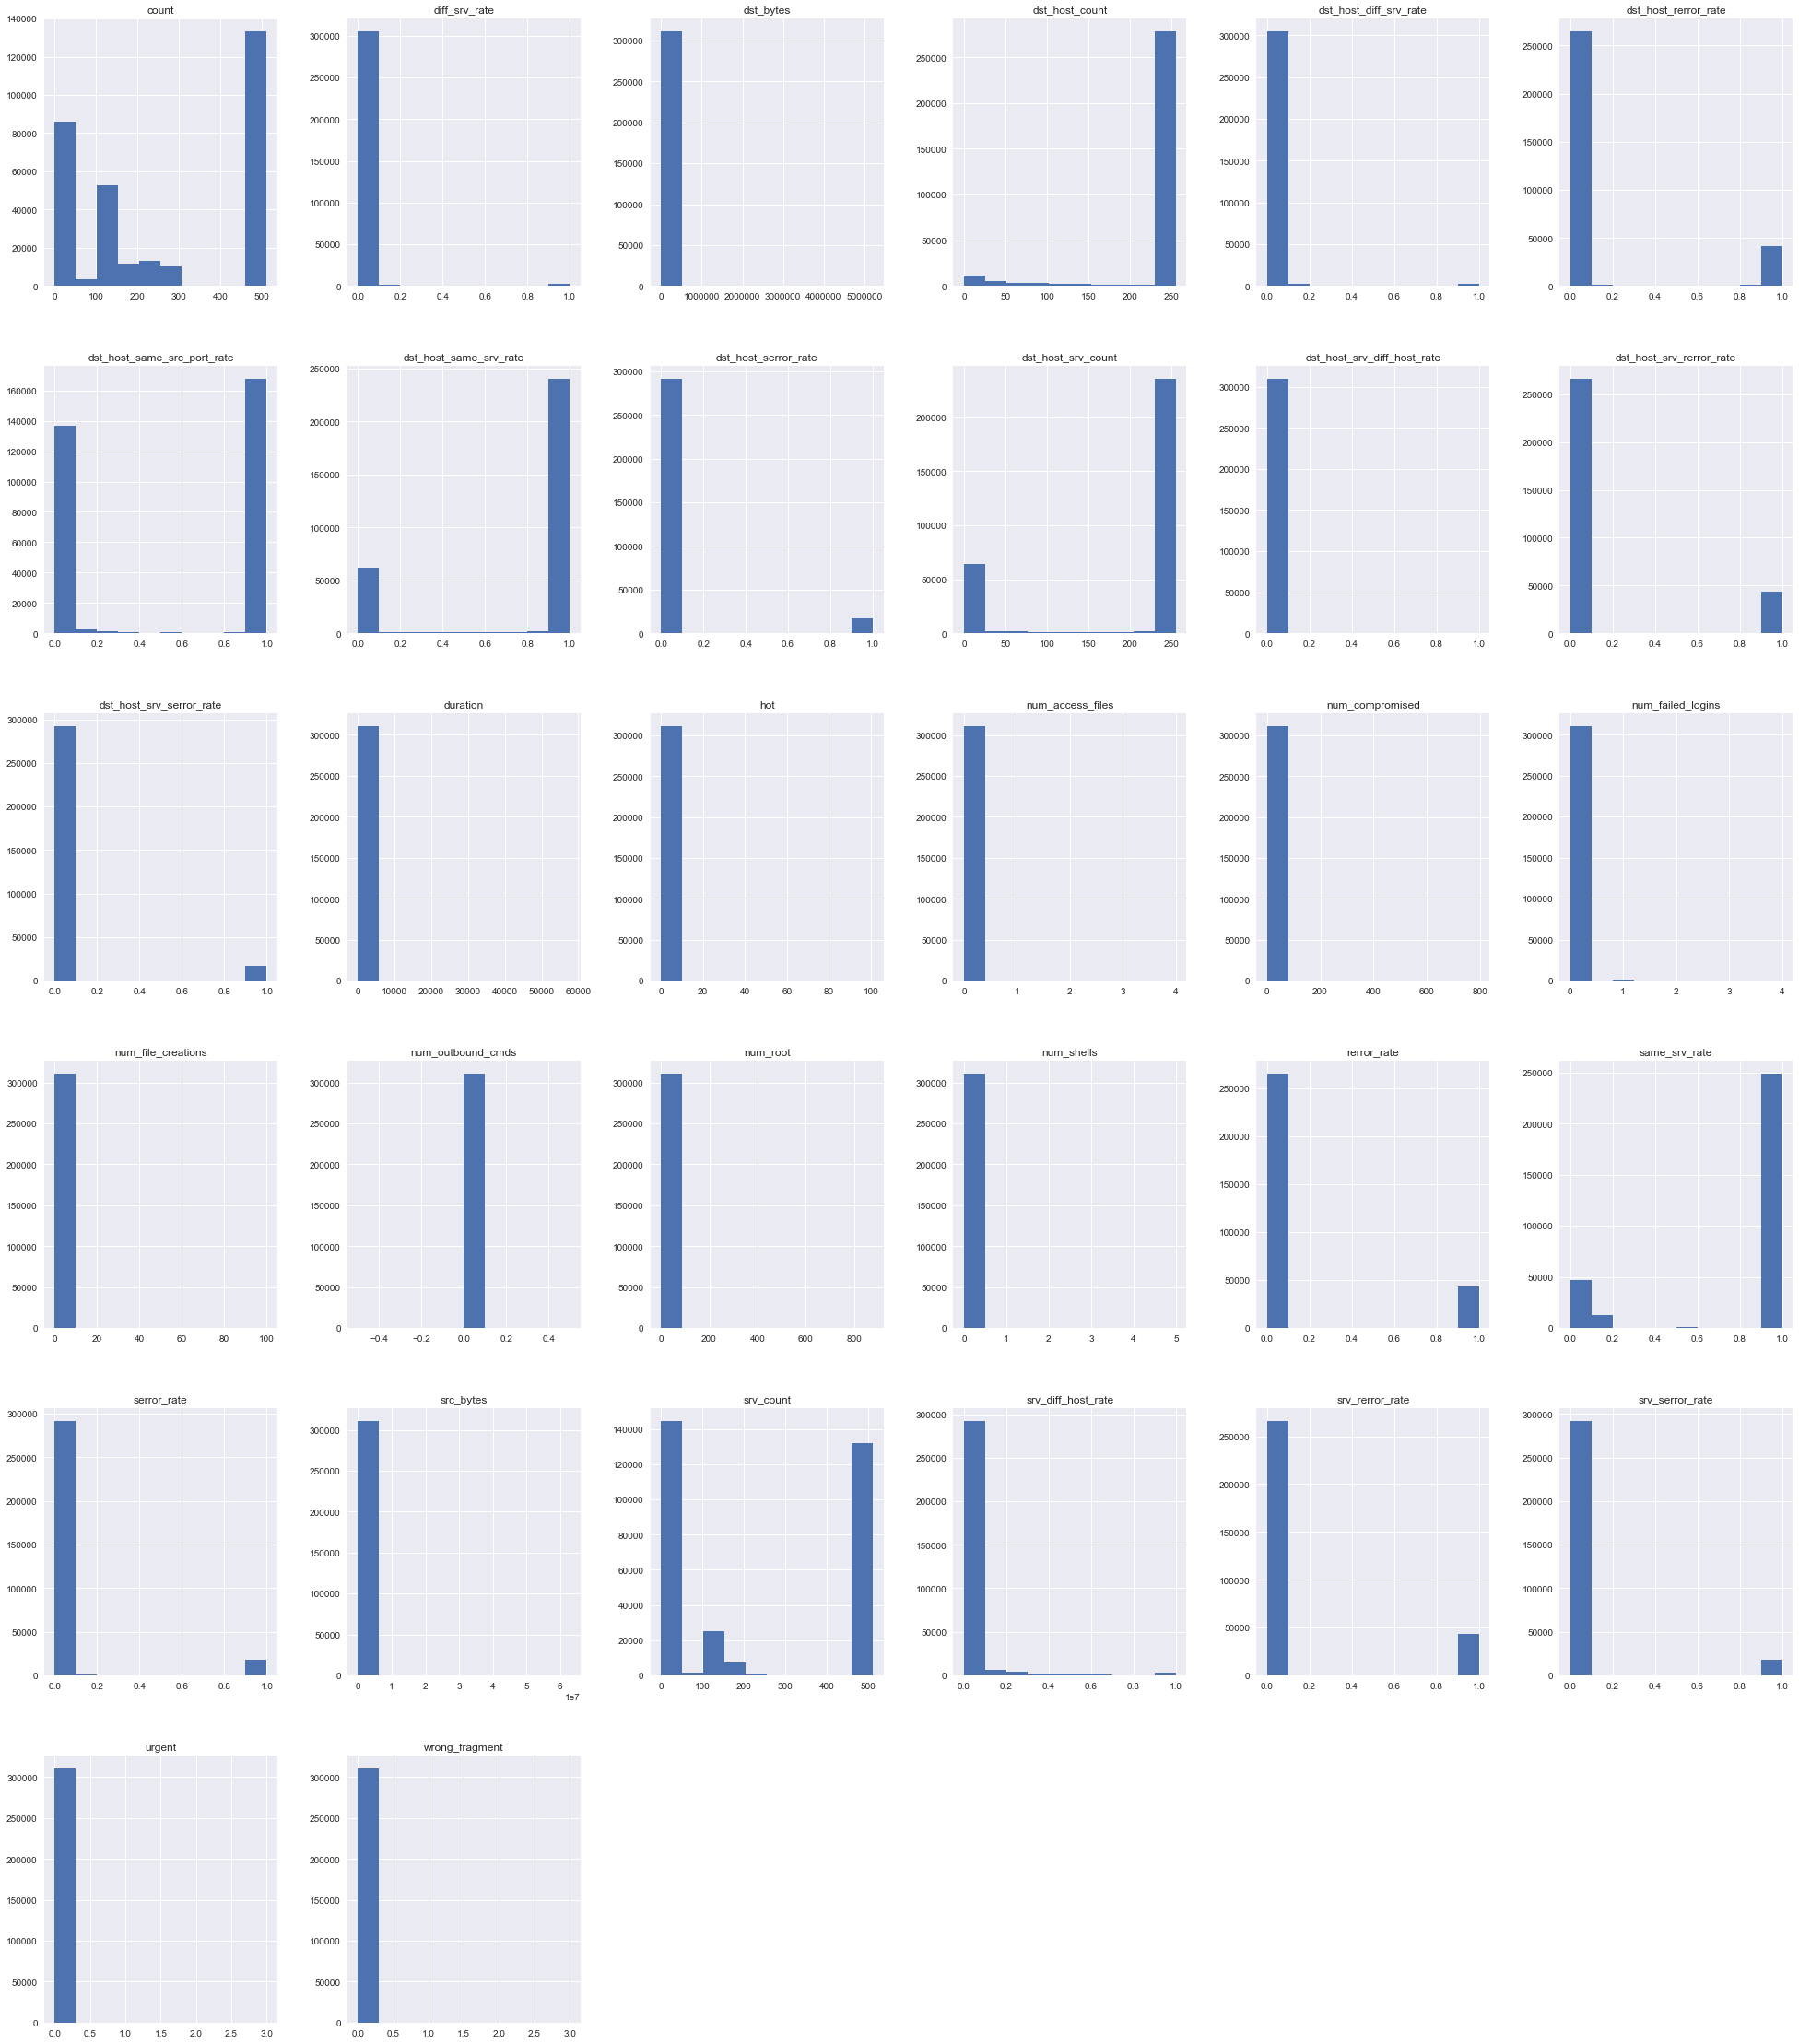

In [16]:
df_non_categorical.hist(figsize = (34,40));

### Matriz de correlação

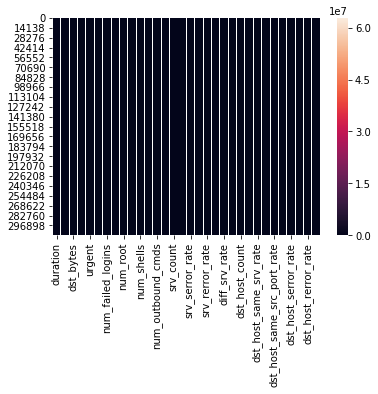

In [10]:
ax = sns.heatmap(df_non_categorical)
ax

# Análise de dados redundantes

De acordo com Tavallaee (2009), o grande número de registros redundantes pode enviesar os classificadores para os registros mais frequentes. Desssa forma, o autor propõe um novo dataset, removendo as duplicatas. Dessa forma, analisaremos o dataset KDD99 completo e o sem as duplicatas. Para tal analisaremos a razão entre os dados únicos e os duplicados e plotaremos os gráficos de relação entre os ataques e serviços, e entre os ataques e protocolos utilizados.

In [3]:
# Loading dataframe
df = pd.read_csv("data/corrected.csv",sep=',',header=None)

# Removing dupicates
df2 = df.drop_duplicates()
percentage = 1 - float(df2[0].count())/float(df[0].count())
print("O dataset sem duplicatas é {}% menor que o dataset original".format(percentage * 100))

O dataset sem duplicatas é 75.14990563580888% menor que o dataset original


In [5]:
#Mapping strings to int
c1 = df[1].unique()
c2 = df[2].unique()
c3 = df[3].unique()

d_protocol = {}
d_service = {}
d_wtver = {}
for i in range(len(c1)):
    d_protocol[c1[i]] = i

for i in range(len(c2)):
    d_service[c2[i]] = i
    
for i in range(len(c3)):
    d_wtver[c3[i]] = i

for i in d_protocol:
    df = df.replace(i, d_protocol[i])
for i in d_service:
    df = df.replace(i, d_service[i])
for i in d_wtver:
    df = df.replace(i, d_wtver[i])

In [7]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(df.iloc[:,:41], df[41])
p = clf.predict(df.iloc[:,:41])

snmpgetattack.
snmpgetattack.
snmpgetattack.
normal.
normal.
normal.
normal.
snmpgetattack.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
snmpgetattack.
normal.
snmpgetattack.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
snmpgetattack.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
snmpgetattack.
normal.
normal.
snmpgetattack.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
snmpgetattack.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
snmpgetattack.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
snmpgetattack.
snmpgetattack.
snmpgetattack.
normal.
normal.
normal.
normal.
snmpgetattack.
normal.
snmpgetattack.
normal.
normal.
normal.
normal.
snmpgetattack.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
snmpgetattack.
normal.
no

smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.

smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.

smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
normal.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf

smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.

smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.

smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.

smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.

smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.

smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.

smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.

smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.

smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.

smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.

smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.

smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.

smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.

saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
satan.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.
saint.

normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
snmpgetattack.
snmpgetattack.
normal.
normal.
normal.
snmpgetattack.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
snmpgetattack.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
snmpgetattack.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
snmpgetattack.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
snmpgetattack.
normal.
snmpgetattack.
normal.
normal.
snmpgetattack.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
snmpgetattack.
normal.
normal.
normal.
normal.
normal.
normal.
snmpgetattack.
normal.
normal.
normal.
normal.
normal.
normal.
snmpgetatta

normal.
normal.
normal.
normal.
normal.
snmpgetattack.
normal.
normal.
normal.
snmpgetattack.
normal.
normal.
normal.
snmpgetattack.
normal.
normal.
snmpgetattack.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
snmpgetattack.
normal.
normal.
normal.
normal.
normal.
normal.
snmpgetattack.
normal.
normal.
snmpgetattack.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
snmpgetattack.
normal.
normal.
normal.
snmpgetattack.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
snmpgetattack.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
snmpgetattack.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
nor

normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
snmpgetattack.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
snmpgetattack.
snmpgetattack.
normal.
normal.
normal.
normal.
snmpgetattack.
normal.
normal.
snmpgetattack.
normal.
normal.
normal.
snmpgetattack.
normal.
snmpgetattack.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
snmpgetattack.
normal.
normal.
normal.
snmpgetattack.
snmpgetattack.
normal.
normal.
normal.
snmpgetattack.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
snmpgetattack.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
snmpgetattack.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
snmpgetattack.
normal.
normal.
normal.
snmpgetattack.
normal.
snmpgetattack.
snmpgetattack.
normal.
normal.
snmpgetattack.
normal.
normal.
normal.
sn

smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.

smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.

smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.

smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.

smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.

smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.

smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.

smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.

smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.

smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.

smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.

smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.

smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.

smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.

smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.

smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.

smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.

normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
warezmaster.
warezmaster.
warezmaster.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
n

normal.
normal.
normal.
normal.
normal.
normal.
normal.
warezmaster.
normal.
warezmaster.
warezmaster.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
guess_passwd.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
guess_passwd.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
guess_passwd.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
guess_passwd.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
warezmaster.
warezmaster.
warezmaster.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
guess_passwd.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
norm

satan.
satan.
satan.
satan.
satan.
satan.
satan.
satan.
satan.
satan.
satan.
satan.
satan.
satan.
satan.
satan.
satan.
satan.
normal.
normal.
normal.
normal.
satan.
normal.
normal.
normal.
normal.
normal.
normal.
satan.
normal.
normal.
normal.
satan.
normal.
satan.
normal.
satan.
satan.
normal.
satan.
satan.
satan.
satan.
satan.
satan.
satan.
satan.
satan.
satan.
satan.
satan.
satan.
satan.
satan.
satan.
satan.
satan.
satan.
satan.
satan.
satan.
satan.
satan.
satan.
satan.
satan.
satan.
satan.
satan.
satan.
satan.
satan.
satan.
satan.
satan.
satan.
satan.
satan.
satan.
satan.
satan.
satan.
normal.
normal.
normal.
normal.
satan.
satan.
satan.
satan.
satan.
satan.
satan.
satan.
satan.
satan.
satan.
normal.
satan.
satan.
satan.
satan.
satan.
satan.
satan.
normal.
satan.
normal.
normal.
normal.
satan.
satan.
satan.
normal.
normal.
satan.
satan.
satan.
satan.
satan.
satan.
satan.
satan.
satan.
satan.
satan.
satan.
satan.
satan.
satan.
satan.
satan.
normal.
satan.
satan.
satan.
satan.
satan.

mscan.
mscan.
mscan.
mscan.
mscan.
mscan.
mscan.
mscan.
mscan.
mscan.
mscan.
mscan.
normal.
normal.
mscan.
mscan.
normal.
mscan.
normal.
normal.
warezmaster.
warezmaster.
warezmaster.
mscan.
mscan.
mscan.
mscan.
mscan.
mscan.
mscan.
mscan.
mscan.
mscan.
mscan.
mscan.
mscan.
mscan.
mscan.
mscan.
mscan.
mscan.
mscan.
normal.
normal.
normal.
normal.
mscan.
normal.
mscan.
mscan.
mscan.
mscan.
mscan.
mscan.
mscan.
mscan.
mscan.
mscan.
mscan.
mscan.
mscan.
mscan.
mscan.
mscan.
mscan.
mscan.
mscan.
mscan.
mscan.
warezmaster.
warezmaster.
warezmaster.
normal.
mscan.
normal.
normal.
normal.
normal.
mscan.
normal.
normal.
normal.
warezmaster.
warezmaster.
warezmaster.
mscan.
mscan.
mscan.
mscan.
mscan.
mscan.
mscan.
mscan.
mscan.
mscan.
mscan.
mscan.
mscan.
mscan.
normal.
normal.
normal.
normal.
mscan.
mscan.
normal.
mscan.
mscan.
mscan.
mscan.
mscan.
mscan.
mscan.
mscan.
mscan.
mscan.
mscan.
mscan.
mscan.
mscan.
mscan.
mscan.
warezmaster.
warezmaster.
warezmaster.
mscan.
smurf.
smurf.
smurf.
sm

smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.

smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.

mscan.
warezmaster.
warezmaster.
warezmaster.
mscan.
mscan.
mscan.
mscan.
mscan.
mscan.
mscan.
mscan.
mscan.
mscan.
warezmaster.
warezmaster.
warezmaster.
mscan.
mscan.
mscan.
mscan.
mscan.
mscan.
mscan.
mscan.
mscan.
mscan.
mscan.
mscan.
mscan.
mscan.
mscan.
mscan.
mscan.
mscan.
mscan.
warezmaster.
warezmaster.
warezmaster.
mscan.
mscan.
mscan.
mscan.
mscan.
mscan.
mscan.
mscan.
mscan.
mscan.
mscan.
mscan.
warezmaster.
warezmaster.
warezmaster.
mscan.
mscan.
mscan.
mscan.
mscan.
mscan.
mscan.
mscan.
mscan.
warezmaster.
warezmaster.
warezmaster.
mscan.
mscan.
mscan.
mscan.
mscan.
mscan.
mscan.
mscan.
mscan.
mscan.
mscan.
mscan.
mscan.
mscan.
mscan.
mscan.
mscan.
mscan.
warezmaster.
warezmaster.
warezmaster.
mscan.
mscan.
mscan.
mscan.
mscan.
mscan.
mscan.
mscan.
mscan.
mscan.
mscan.
warezmaster.
warezmaster.
warezmaster.
mscan.
mscan.
mscan.
mscan.
mscan.
mscan.
mscan.
mscan.
mscan.
warezmaster.
warezmaster.
warezmaster.
mscan.
mscan.
warezmaster.
warezmaster.
warezmaster.
normal.
msca

normal.
normal.
snmpgetattack.
warezmaster.
warezmaster.
warezmaster.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
snmpgetattack.
snmpgetattack.
normal.
normal.
normal.
snmpgetattack.
normal.
normal.
snmpgetattack.
normal.
snmpgetattack.
snmpgetattack.
snmpgetattack.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
snmpgetattack.
normal.
snmpgetattack.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
snmpgetattack.
normal.
normal.
snmpgetattack.
normal.
snmpgetattack.
normal.
normal.
normal.
normal.
normal.
warezmaster.
warezmaster.
warezmaster.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
snmpgetattack.
snmpgetattack.
normal.
normal.
normal.
normal.
snmpgetattack.
normal.
normal.
snmpgetattack.
snmpgetattack.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
ware

normal.
normal.
normal.
snmpgetattack.
warezmaster.
warezmaster.
warezmaster.
snmpgetattack.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
snmpgetattack.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
snmpgetattack.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
snmpgetattack.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
warezmaster.
warezmaster.
normal.
warezmaster.
normal.
normal.
snmpgetattack.
normal.
normal.
normal.
normal.
normal.
normal.
snmpgetattack.
snmpgetattack.
normal.
normal.
snmpgetattack.
normal.
normal.
snmpgetattack.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
snmpgetattack.
normal.
normal.
norma

normal.
normal.
normal.
normal.
normal.
snmpgetattack.
snmpgetattack.
snmpgetattack.
snmpgetattack.
normal.
normal.
snmpgetattack.
normal.
normal.
normal.
snmpgetattack.
normal.
snmpgetattack.
snmpgetattack.
normal.
snmpgetattack.
normal.
snmpgetattack.
snmpgetattack.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
snmpgetattack.
snmpgetattack.
normal.
normal.
snmpgetattack.
normal.
normal.
normal.
normal.
warezmaster.
warezmaster.
warezmaster.
normal.
snmpgetattack.
snmpgetattack.
normal.
normal.
snmpgetattack.
snmpgetattack.
normal.
normal.
snmpgetattack.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
snmpgetattack.
snmpgetattack.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
snmpgetattack.
normal.
snmpget

normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
snmpgetattack.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
warezmaster.
warezmaster.
warezmaster.
normal.
normal.
normal.
snmpgetattack.
snmpgetattack.
normal.
normal.
normal.
normal.
normal.
snmpgetattack.
snmpgetattack.
normal.
normal.
normal.
normal.
normal.
normal.
snmpgetattack.
normal.
normal.
normal.
normal.
normal.
snmpgetattack.
normal.
normal.
normal.
warezmaster.
warezmaster.
warezmaster.
normal.
normal.
normal.
normal.
snmpgetattack.
snmpgetattack.
snmpgetattack.
snmpgetattack.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
warezmaster.
warezmaster.
warezmaster.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal

normal.
normal.
normal.
normal.
snmpgetattack.
normal.
normal.
normal.
snmpgetattack.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
snmpgetattack.
normal.
normal.
normal.
snmpgetattack.
normal.
normal.
warezmaster.
normal.
warezmaster.
warezmaster.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
snmpgetattack.
normal.
normal.
normal.
normal.
snmpgetattack.
guess_passwd.
snmpgetattack.
normal.
normal.
normal.
normal.
snmpgetattack.
normal.
normal.
normal.
normal.
portsweep.
snmpgetattack.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
portsweep.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal

normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
warezmaster.
warezmaster.
warezmaster.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
snmpgetattack.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
nmap.
normal.
portsweep.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
snmpgetattack.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
snmpgetattack.
normal.
normal.
snmpgetattack.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
snmpgetattack.
snmpgetattack.
normal.
normal.
portsweep.
guess_passwd.
normal.
httptunnel.
httptunnel.
normal.
normal.
normal.
warezmaster.
warezmaster.
war

neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
n

normal.
normal.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
normal.
normal.
normal.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
normal.
normal.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.

neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
snmpgetattack.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
nept

neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
normal.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
ne

neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
normal.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
ne

neptune.
neptune.
neptune.
neptune.
normal.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
normal.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
httptunnel.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.


neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
normal.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
portsweep.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.


neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
normal.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
normal.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
portsweep.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
normal.
neptune.
normal.
normal.
neptune.
neptune.
nept

neptune.
neptune.
normal.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
normal.
neptune.
neptune.
neptune.
neptune.
normal.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
nept

snmpgetattack.
snmpgetattack.
normal.
normal.
normal.
snmpgetattack.
normal.
normal.
normal.
normal.
normal.
nmap.
normal.
snmpgetattack.
warezmaster.
warezmaster.
warezmaster.
normal.
snmpgetattack.
normal.
normal.
normal.
normal.
snmpgetattack.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
snmpgetattack.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
snmpgetattack.
normal.
normal.
snmpgetattack.
snmpgetattack.
normal.
normal.
normal.
normal.
normal.
snmpgetattack.
normal.
normal.
normal.
normal.
normal.
snmpgetattack.
normal.
normal.
normal.
snmpgetattack.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
snmpgetattack.
normal.
normal.
normal.
snmpgetattack.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
snmpgetattack.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
snmpgetattack.
snmp

mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
snmpgetattack.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
snmpgetattack.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
snmpgetattack.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
normal.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
portsweep.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbo

mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
portsweep.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.
mailbomb.

snmpgetattack.
snmpgetattack.
portsweep.
normal.
normal.
snmpgetattack.
normal.
normal.
normal.
snmpgetattack.
snmpgetattack.
normal.
normal.
normal.
snmpgetattack.
snmpgetattack.
snmpgetattack.
portsweep.
normal.
normal.
snmpgetattack.
snmpgetattack.
normal.
normal.
normal.
normal.
snmpgetattack.
normal.
portsweep.
snmpgetattack.
normal.
normal.
normal.
normal.
snmpgetattack.
snmpgetattack.
normal.
normal.
snmpgetattack.
snmpgetattack.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
snmpgetattack.
normal.
normal.
normal.
portsweep.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
snmpgetattack.
snmpgetattack.
snmpgetattack.
normal.
normal.
snmpgetattack.
normal.
normal.
normal.
normal.
normal.
snmpgetattack.
normal.
snmpgetattack.
normal.
snmpgetattack.
normal.
normal.
normal.
snmpgetattack.
normal.
xterm.
portsweep.
normal.
warezmaster.
warezmaster.
warezmaster.
normal.
normal.
normal.
snmpgetattack.
snmpgetattack.
normal.
portsweep.
snmpgetatta

normal.
guess_passwd.
normal.
guess_passwd.
guess_passwd.
guess_passwd.
normal.
guess_passwd.
guess_passwd.
guess_passwd.
snmpgetattack.
guess_passwd.
normal.
normal.
guess_passwd.
normal.
guess_passwd.
guess_passwd.
guess_passwd.
snmpgetattack.
normal.
guess_passwd.
snmpgetattack.
guess_passwd.
guess_passwd.
normal.
normal.
guess_passwd.
guess_passwd.
normal.
normal.
guess_passwd.
guess_passwd.
normal.
guess_passwd.
guess_passwd.
guess_passwd.
normal.
guess_passwd.
normal.
normal.
guess_passwd.
normal.
guess_passwd.
normal.
normal.
guess_passwd.
normal.
normal.
normal.
guess_passwd.
normal.
normal.
guess_passwd.
guess_passwd.
guess_passwd.
guess_passwd.
guess_passwd.
normal.
guess_passwd.
guess_passwd.
normal.
guess_passwd.
guess_passwd.
guess_passwd.
normal.
guess_passwd.
guess_passwd.
guess_passwd.
normal.
guess_passwd.
guess_passwd.
guess_passwd.
snmpgetattack.
guess_passwd.
normal.
guess_passwd.
normal.
guess_passwd.
guess_passwd.
guess_passwd.
normal.
normal.
guess_passwd.
normal

normal.
snmpgetattack.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
snmpgetattack.
snmpgetattack.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
snmpgetattack.
snmpgetattack.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
snmpgetattack.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
warezmaster.
warezmaster.
warezmaster.
normal.
normal.
normal.
snmpgetattack.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
snmpgetattack.
normal.
normal.
normal.
snmpgetattack.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
no

guess_passwd.
guess_passwd.
normal.
normal.
guess_passwd.
guess_passwd.
normal.
guess_passwd.
guess_passwd.
normal.
guess_passwd.
guess_passwd.
guess_passwd.
guess_passwd.
guess_passwd.
normal.
normal.
normal.
guess_passwd.
normal.
normal.
guess_passwd.
guess_passwd.
normal.
guess_passwd.
normal.
guess_passwd.
guess_passwd.
guess_passwd.
guess_passwd.
normal.
guess_passwd.
guess_passwd.
guess_passwd.
normal.
guess_passwd.
guess_passwd.
guess_passwd.
warezmaster.
warezmaster.
warezmaster.
guess_passwd.
guess_passwd.
normal.
guess_passwd.
guess_passwd.
normal.
guess_passwd.
guess_passwd.
normal.
guess_passwd.
normal.
guess_passwd.
normal.
normal.
guess_passwd.
normal.
guess_passwd.
normal.
normal.
guess_passwd.
normal.
guess_passwd.
normal.
guess_passwd.
guess_passwd.
normal.
guess_passwd.
snmpgetattack.
guess_passwd.
guess_passwd.
guess_passwd.
snmpgetattack.
normal.
normal.
guess_passwd.
guess_passwd.
guess_passwd.
snmpgetattack.
guess_passwd.
guess_passwd.
guess_passwd.
guess_passwd.


guess_passwd.
normal.
guess_passwd.
guess_passwd.
guess_passwd.
normal.
guess_passwd.
guess_passwd.
guess_passwd.
guess_passwd.
guess_passwd.
guess_passwd.
guess_passwd.
snmpgetattack.
guess_passwd.
guess_passwd.
guess_passwd.
guess_passwd.
guess_passwd.
normal.
normal.
guess_passwd.
guess_passwd.
guess_passwd.
guess_passwd.
guess_passwd.
guess_passwd.
guess_passwd.
guess_passwd.
guess_passwd.
snmpgetattack.
guess_passwd.
guess_passwd.
guess_passwd.
normal.
guess_passwd.
guess_passwd.
guess_passwd.
guess_passwd.
normal.
guess_passwd.
guess_passwd.
guess_passwd.
normal.
guess_passwd.
guess_passwd.
guess_passwd.
normal.
guess_passwd.
guess_passwd.
guess_passwd.
guess_passwd.
guess_passwd.
guess_passwd.
guess_passwd.
guess_passwd.
guess_passwd.
guess_passwd.
guess_passwd.
guess_passwd.
guess_passwd.
normal.
guess_passwd.
guess_passwd.
guess_passwd.
snmpgetattack.
guess_passwd.
guess_passwd.
guess_passwd.
guess_passwd.
guess_passwd.
guess_passwd.
guess_passwd.
guess_passwd.
snmpgetattack.


normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
snmpgetattack.
snmpgetattack.
snmpgetattack.
snmpgetattack.
snmpgetattack.
snmpgetattack.
snmpgetattack.
snmpgetattack.
snmpgetattack.
snmpgetattack.
snmpgetattack.
snmpgetattack.
normal.
normal.
normal.
normal.
normal.
warezmaster.
warezmaster.
warezmaster.
normal.
normal.
normal.
normal.
snmpgetattack.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
snmpgetattack.
snmpgetattack.
snmpgetattack.
normal.
normal.
normal.
warezmaster.
warezmaster.
warezmaster.
snmpgetattack.
snmpgetattack.
snmpgetattack.
snmpgetattack.
snmpgetattack.
snmpgetattack.
normal.
normal.
normal.
snmpgetattack.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
snmpgetattack.
snmpgetattack.
snmpgetattack.
snmpgetattack.
snmpgetattack.
snmpgetattack.
snmpgetattack.
snmpgetattack.
snmpgetattack.
warezmaster.
warezmaster.
warezmaster.
snmpgetattack.
snmpgetattack.
snmpgetattack

normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
portsweep.
portsweep.
portsweep.
portsweep.
normal.
normal.
portsweep.
portsweep.
portsweep.
portsweep.
portsweep.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
norma

normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.


normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
satan.
satan.
satan.
satan.
satan.
satan.
satan.
satan.
satan.
satan.
satan.
satan.
satan.
satan.
satan.
satan.
satan.
satan.
satan.
satan.
satan.
satan.
satan.
satan.
satan.
satan.
satan.
satan.
satan.
satan.
satan.

normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.


normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.


neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
n

neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
n

neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
n

neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
n

neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
normal.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
ne

neptune.
neptune.
neptune.
neptune.
neptune.
normal.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
normal.
neptune.
neptune.
neptune.
normal.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
nept

neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
n

neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
normal.
normal.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
nep

neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
normal.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
ne

smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.

smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.

smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.

smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.

smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.

smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.

smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.

smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.

smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.

smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.

smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.

smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.

smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.

smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.

smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.

normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.


normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.


smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.

smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.

smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.

smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.

smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.

normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.


normal.
normal.
normal.
normal.
snmpguess.
normal.
normal.
normal.
normal.
normal.
normal.
snmpguess.
normal.
normal.
snmpguess.
normal.
snmpguess.
normal.
normal.
normal.
normal.
normal.
snmpguess.
snmpguess.
normal.
snmpguess.
normal.
normal.
normal.
normal.
snmpguess.
snmpguess.
normal.
snmpguess.
normal.
normal.
normal.
normal.
snmpguess.
normal.
normal.
normal.
normal.
snmpguess.
normal.
snmpguess.
normal.
normal.
normal.
snmpguess.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
snmpguess.
snmpguess.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
snmpguess.
normal.
normal.
normal.
normal.
snmpguess.
normal.
normal.
normal.
normal.
snmpguess.
snmpguess.
normal.
snmpguess.
normal.
normal.
snmpguess.
snmpguess.
normal.
snmpguess.
normal.
snmpguess.
normal.
snmpguess.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
snmpguess.
normal.
normal.
normal.
normal.
normal.
snmpguess.
snmpguess.
snmpguess.
snmpguess.
nor

normal.
normal.
normal.
normal.
normal.
normal.
snmpguess.
normal.
normal.
normal.
normal.
normal.
snmpguess.
snmpguess.
normal.
normal.
normal.
snmpguess.
normal.
normal.
normal.
snmpguess.
normal.
normal.
normal.
normal.
normal.
normal.
snmpguess.
normal.
normal.
snmpguess.
normal.
normal.
normal.
normal.
snmpguess.
snmpguess.
snmpguess.
normal.
normal.
normal.
normal.
normal.
normal.
snmpguess.
normal.
snmpguess.
normal.
snmpguess.
normal.
snmpguess.
normal.
normal.
snmpguess.
snmpguess.
normal.
normal.
snmpguess.
normal.
normal.
normal.
normal.
normal.
snmpguess.
normal.
normal.
snmpguess.
normal.
normal.
normal.
normal.
snmpguess.
normal.
normal.
snmpguess.
snmpguess.
normal.
normal.
snmpguess.
snmpguess.
normal.
snmpguess.
normal.
normal.
snmpguess.
snmpguess.
normal.
snmpguess.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
snmpguess.
normal.
normal.
normal.
normal.
snmpguess.
normal.
snmpguess.
normal.
snmpguess.
normal.
normal.
normal.
snmpguess.
snmpguess.
normal.
sn

smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.

smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.

smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.

smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.

smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.

smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.

smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.

smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.

smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.

smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.

smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.

smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.

smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.

smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.

smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.

smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.

smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.

smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.

smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.

smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.

smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.

smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.
smurf.

normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
snmpgetattack.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
snmpgetattack.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
snmpgetattack.
normal.
normal.
normal.
normal.
normal.
normal.
snmpgetattack.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
snmpgetattack.
normal.
normal.
normal.
normal.
normal.
snmpgetattack.
normal.
snmpgetattack.
snmpgetattack.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
snmpgetattack.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
snmpgetattack.
normal.
snmpgetattack.
nor

normal.
normal.
normal.
normal.
snmpgetattack.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
snmpgetattack.
snmpgetattack.
snmpgetattack.
normal.
snmpgetattack.
normal.
normal.
normal.
snmpgetattack.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
snmpgetattack.
normal.
normal.
normal.
snmpgetattack.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
snmpgetattack.
normal.
normal.
normal.
normal.
normal.
normal.
snmpgetattack.
normal.
normal.
normal.
snmpgetattack.
snmpgetattack.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
snmpgetattack.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
norma

back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
normal.
back.
back.
back.
back.
back.
back.
normal.
back.
normal.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back.
back

normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
snmpgetattack.
normal.
normal.
snmpgetattack.
normal.
normal.
normal.
normal.
snmpgetattack.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
snmpgetattack.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
snmpgetattack.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
snmpgetattack.
normal.
normal.
normal.
normal.
snmpgetattack.
snmpgetattack.
normal.
snmpgetattack.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
snmpgetattack.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
no

neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
n

neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
n

neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
n

neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
n

neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
n

neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
n

neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
neptune.
n

normal.
normal.
snmpgetattack.
snmpgetattack.
snmpgetattack.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
normal.
snmpgetattack.
snmpgetattack.
snmpgetattack.
snmpgetattack.
snmpgetattack.
snmpgetattack.
snmpgetattack.
snmpgetattack.
snmpgetattack.
snmpgetattack.
snmpgetattack.
snmpgetattack.
snmpgetattack.
snmpgetattack.
snmpgetattack.
snmpgetattack.
normal.
snmpgetattack.
snmpgetattack.
snmpgetattack.
snmpgetattack.
snmpgetattack.
snmpgetattack.
snmpgetattack.
snmpgetattack.
snmpgetattack.
snmpgetattack.
snmpgetattack.
snmpgetattack.
snmpgetattack.
snmpgetattack.
snmpgetattack.
snmpgetattack.
snmpgetattack.
snmpgetattack.
snmpgetattack.
snmpgetattack.
snmpgetattack.
normal.
normal.
normal.
normal.
normal.
snmpgetattack.
snmpgetattack.
snmpgetattack.
snmpgetattack.
snmpgetattack.
snmpgetattack.
snmpgetattack.
snmpgetattack.
snmpgetattack.
snmpgetattack.
snmpgetattack.
snmpgetattack.
snmpgetattack.
snmpgetattack.
snmpgetattack.
snmpgetattack.
